# Studying Sandpiles As Self-Organising Criticalities

## Aim

The report will investigate and analyse the results gained from building a heuristic sandpile model to study self-organising criticality and non-Gaussian statistics. Sandpile simulations are used to build up intuition about the behaviour of complex systems, which are systems that have many components and a lot of modelled energy flow between them. In the first part of this report, the basic Abelian Sandpile simulation will be illustrated, with graphs plotting features of avalanche events that are events where sand particles are toppled, affecting the states of the surrounding area. 


## Chapter 1. General Background

### 1.1.	Why Study Complex Systems? 
Real world problems ranging from biology, geology, astronomy, economy and even society, are all the similar in the fact that they’re extremely complex. Complexity science is dedicated at studying two aspects: how systems and components react, and how can their behaviour be predicted. As our domain knowledge and computational capabilities inhibit precise modelling of system dynamics, there is a dire need of using statistical modelling to augment our understanding of these complex systems.


### 1.2.	Self-Organised Criticalities
First coined by Bak, Tang and Wiesenfeld in 1987, self-organised criticalities are a theorised model of complex systems where the state naturally evolves into a critical state, as a by-product of a series of short range interactions. That critical state is a transitional event (e.g. an avalanche trigger, or a stock market crash). There has to be a slow driving mechanism for the system to reach that critical state, upon which the rare event occurs. Until self-organisation criticalities (SOCs) were introduced, it was generally accepted that all systems abide to the laws of thermodynamics. The second law states that energy is conserved, i.e. that equilibrium within a system is maintained. The notion of SOCs is tied with work in no equilibrium thermodynamics, including that pioneered by chemist and Nobel laureate Ilya Prigogine in his study of dissipative structures. 

### 1.3.	The Abelian / Bak-Tang-Wiesenfeld Model
The Abelian / Bak-Tang-Wiesenfeld Sandpile Simulation was first introduced by Per Bak, Chao Tang and Kurt Wiesenfeld in their 1987 paper. It shows how simple dynamics can lead to the emergence of very complex structures and drive the system towards a stationary state which shares several properties of equilibrium systems at the critical point, e.g. power-law decay of cluster sizes and of correlations of the height-variables. The model is a discrete-time, finite state cellular automata.

### 1.4. Toppling Rules  
**(1)** * z(i, j, t) = z(i, j, t) -  4*   
**(2)** * z(i ± 1, j, t) = z(i ± 1, j, t) + 1*  
**(3)** * z(i, j ± 1, t) = z(i, j ± 1, t) + 1*

1- 
2- have a natural wurdtion? probability of market chaos as scalling parameter of panic
market some sort of equilibrium 



## Chapter 2. Analysing the Sandpile  
### 2.1.   Experiments  

Larger sandpile dimensions lead to longer times for the system to have avalanche events.


( 1 ) **Size (s)** This quantity is measured by how many grains of sand are displaced in a single avalanche event

( 2 ) **Lifetime (t)** This is the number of timesteps it takes for an avalanche to relax the system to a critical state.

( 3 ) **Area (a)** The number of unique sites toppled in a given avalanche (not the same as (1)).

( 4 ) **Radius (r)** This can be measured in a number of ways, but it is essentially a measure of the distance from the original toppling site that the avalanche reaches. For the sake of consistency, we will define this as the maximum number of sites away from the initial site the avalanche reaches.  


#### 2.1.1. Random Sandpile   
Sandpile size: 50*50 
Time steps: 10,000
Critical state / threshold: 4 sand grains

#### 2.1.2.  Centre Point Sandpile 
Sandpile size: 50*50 
Time steps: 10,000
Critical state / threshold: 4 sand grains


### 2.2. Power-Law Behaviour
The power law (also called the scaling law) states that a relative change in one quantity results in a proportional relative change in another. It implies a small number of occurrences is common, while larger occurrences are rare, i.e. there were more small avalanches than large ones.


### 2.3. Ergodic Measurements  
The ergodic hypothesis is the statement that all states of a system with a given energy are equally likely to occur over long periods of time. Adopting the ergodic hypothesis allows one to compute the average behaviour of a system over time by instead performing an average over states. Sandpiles appear to satisfy the theorem. 


### 3. Modified Abeilan / Bak-Tang-Wiesenfeld Sandpile Simulation

In [1]:
from   random  import randrange
import numpy   as np
from scipy.stats.stats import pearsonr
from IPython.display import Markdown as md

#import plots

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm
from pylab import *


plt.style.use('seaborn') # styling matplotlib plots


def plot(data):
    values = [0,1,2,3]
    plt.figure(figsize=(15,4))
    im = plt.imshow(data, interpolation='none')
    colors = [ im.cmap(im.norm(value)) for value in values]
    patches = [ mpatches.Patch(color=colors[i], label="Level {l}".format(l=values[i]) ) for i in range(len(values)) ]
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
    for y in range(data.shape[0]):
        for x in range(data.shape[1]):
            plt.text(x  , y  , '%.0f' % data[y, x],horizontalalignment='center',verticalalignment='center', )
    plt.grid(True)
    plt.show()



def plot3D(sandpile,size):
    x = linspace(-1, 1, size)
    y = x
    X,Y = meshgrid(x, y)
    Z = sandpile#bivariate_normal(X, Y)#sandpile

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap= 'copper_r')
    plt.title('Sandpile at the Last Time Iteration')
    plt.show()
    plt.clf()



def generate_plots(sandpile,time,avalanche_mass,avalanche_size,avalanche_lifetime,avalanche_area,avalanche_radius):
    cutoff = 11000
    time = time -cutoff
  
    plt.title('The sandpile after '+ str(time + cutoff) +' grains dropped.')
    plt.imshow(sandpile, cmap='hot', interpolation='nearest')
    plt.savefig("sandpile.eps", format="eps")
    plt.show()
    plt.clf()

    
    # Plotting Mass Accumelation through Time
    plt.plot(range(1,time),avalanche_mass[cutoff:])
    plt.ylabel(' Mass')
    plt.title('Avalanche Mass Accumelation through Time')
    plt.show()
    plt.clf()
    
    # Plotting Mass Accumelation loglog Power Law
    plt.loglog(range(1,time),avalanche_mass[cutoff:])
    plt.ylabel('Mass')
    plt.title('Avalanche Mass Accumelation through Time - Log Log Plot')
    plt.show()
    plt.clf()

    
    # Plotting lifetime
    plt.plot(range(1,time),avalanche_lifetime[cutoff:])
    plt.title('Avalanche Lifetime')
    plt.show()
    plt.clf()

    # Plotting Size
    plt.plot(range(1,time), avalanche_size[cutoff:], color='c')
    plt.title('Avalanche Size throughout ' + str(time+cutoff) + ' time steps.')
    plt.savefig("size.eps", format="eps")
    plt.show()
    plt.clf()


    # Plotting Radius
    plt.plot(range(1,time),avalanche_radius[cutoff:], color='g')
    plt.title('Avalanche Radius')
    plt.show()
    plt.clf()

    

    
    # Plotting Area
    plt.plot(range(1,time),avalanche_area[cutoff:], color='r')
    plt.title('Avalanche Area')
    plt.show()
    plt.clf()
    
 

    # Plotting lifetime
    hist, bins = np.histogram(avalanche_lifetime[cutoff:], bins=10, normed=False)
    bin_centers = (bins[1:]+bins[:-1])*0.5
    plt.plot(bin_centers, hist )
    plt.title('PDF Avalanche Lifetime')
    plt.show()
    plt.clf()
    
    # Plotting Size
    hist, bins = np.histogram(avalanche_size[cutoff:], bins=10, normed=False)
    bin_centers = (bins[1:]+bins[:-1])*0.5
    plt.plot(bin_centers, hist )
    plt.title('PDF Avalanche Size')
    plt.show()
    plt.clf()
    
    # Plotting Radius
    hist, bins = np.histogram(avalanche_radius[cutoff:], bins=10, normed=False)
    bin_centers = (bins[1:]+bins[:-1])*0.5
    plt.plot(bin_centers, hist )
    plt.title('PDF Avalanche Radius')
    plt.show()
    plt.clf()
    
    
    # Plotting Area
    hist, bins = np.histogram(avalanche_area[cutoff:], bins=10, normed=False)
    bin_centers = (bins[1:]+bins[:-1])*0.5
    plt.plot(bin_centers, hist )
    plt.title('PDF Avalanche Area')
    plt.show()
    plt.clf()
    
    # Plotting Size Power Law
    plt.loglog(range(1,time),avalanche_size[cutoff:])
    plt.ylabel('Size')
    plt.title('Avalanche Size through Time - Log Log Plot')
    plt.show()
    plt.clf()



In [4]:
def BTWsandpile(M, N, show_step=False, time=20, threshold=4, method='center'):

    avalanche_mass = []  # sand particles on the table at a point in time
    avalanche_size = []  # sand particles moved by the avalanche
    avalanche_lifetime = []  ''' timesteps it takes for an avalanche to relax the
                              system to a critical state. '''
    avalanche_radius = []
    avalanche_area = []

    # (1) -  initializes an M by N grid
    sandpile = np.zeros((M, N), dtype=int)

    # (2) -  loop through time steps
    for t in range(time-1):
        if method == 'random':
            # Choose random spot
            M_index = randrange(0, M)
            N_index = randrange(0, N)
        elif method == 'center':
            M_index = M//2
            N_index = N//2

        # Add sand grain
        sandpile[M_index, N_index] += 1

        # (3) - toppling
        radius   = np.zeros((M, N), dtype=int)
        radius[M_index, N_index] = 10
        size     = np.zeros((M, N), dtype=int)
        lifetime = np.zeros((M, N), dtype=int)
        area     = np.zeros((M, N), dtype=int)

        size, lifetime, area, radius = check_threshold(sandpile, M_index,
                                                       N_index, threshold,
                                                       s=size, l=lifetime,
                                                       a=area, r=radius)

        # plotting each step
        if show_step:
            plot(sandpile)

        # calculating mass at time step
        avalanche_mass.append(sandpile.sum())
        avalanche_size.append(size)
        avalanche_lifetime.append(lifetime)
        avalanche_area.append(area)
        avalanche_radius.append(radius)

    # get a plot for the final sandpile, and plot the avalanche's features
    # plot3D(sandpile, max(M,N))
    generate_plots(sandpile, time, avalanche_mass, avalanche_size,
                   avalanche_lifetime, avalanche_area, avalanche_radius)
    
    return (avalanche_mass, avalanche_size, avalanche_lifetime, avalanche_area,
            avalanche_radius, sandpile)




    

In [5]:
############ Avalanche ############

def check_threshold(sandpile,i,j,threshold,s,l,a,r):
    

    
    ## BEGIN AVALANCHE
    
    # IF  (the location is inside the table)
    # AND (the number of sand grains is above the threshold) 
    if not (i > sandpile.shape[0] or  j > sandpile.shape[1] or i <0 or j <0) and sandpile[i,j] >= threshold:
        l[i,j] += 1 #increase lifetime
        s[i,j] += threshold
        a[i,j] = 1
        r = toppling(sandpile,i,j,threshold,s,l,a,r) # execute the toppling rules
        
    ## END AVALANCHE

     
    # Lifetime is how many topplings the avalanche triggered
    lifetime = np.sum(l)
    
    # Area is sum of all unique cells that have been toppled
    area = np.sum(a)
    
    # Radius is how long's the furtherist toppling site from the initial site
    m,n = np.where(r==10) # initial site index
    R,C = np.where(r==1)  # all sites that have been affected
    radius = np.max([abs(R-m)+abs(C-n)]) if R.size !=0 else 0
        
    # Size is how many grains of sand have been displaced    
    size = np.sum(s)

    return size,lifetime,area,radius





############ Toppling rules ############
def toppling(sandpile,i,j,threshold,size,lifetime,area,radius):
    
    # (1) toppling rule: z(i, j, t) = z(i, j, t) -  4
    sandpile[i,j] = sandpile[i,j]  -  threshold
    
    # (2) toppling rule: z(i ± 1, j, t) = z(i ± 1, j, t) + 1
    if i + 1 <= sandpile.shape[0]-1:
        sandpile[i + 1,j]  += 1
        radius[i + 1,j] = 1 if radius[i + 1,j] != 10 else 10
        check_threshold(sandpile, i + 1 ,j,threshold,size,lifetime,area,radius)    
    if i - 1 >= 0:
        sandpile[i - 1,j] += 1
        radius[i - 1,j] = 1 if radius[i - 1,j] != 10 else 10
        check_threshold(sandpile, i - 1 ,j,threshold,size,lifetime,area,radius)    
     
    # (3) toppling rule: z(i, j ± 1, t) = z(i, j ± 1, t) + 1
    if j + 1 <= sandpile.shape[1]-1:
        sandpile[i ,j + 1] += 1
        radius[i ,j + 1] = 1 if radius[i ,j + 1] != 10 else 10
        check_threshold(sandpile,i, j + 1 ,threshold,size,lifetime,area,radius)
    if j - 1 >= 0:
        sandpile[i ,j - 1] += 1
        radius[i ,j - 1] = 1 if radius[i ,j - 1] != 10 else 10
        check_threshold(sandpile,i, j - 1 ,threshold,size,lifetime,area,radius)

    return radius
        




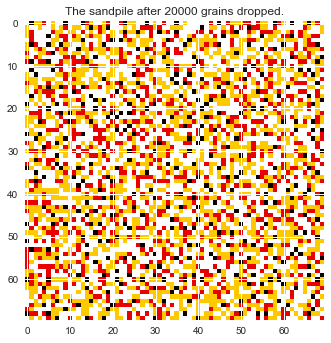

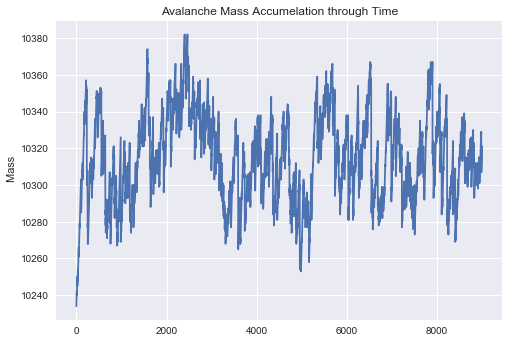

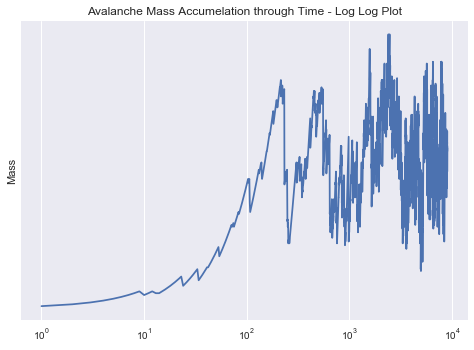

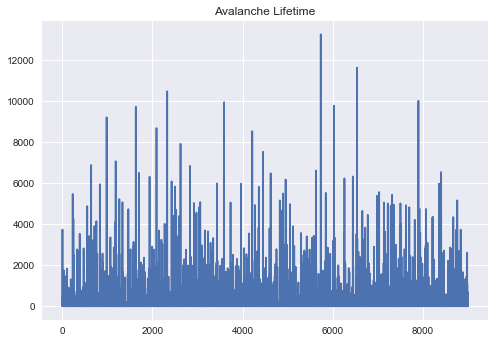

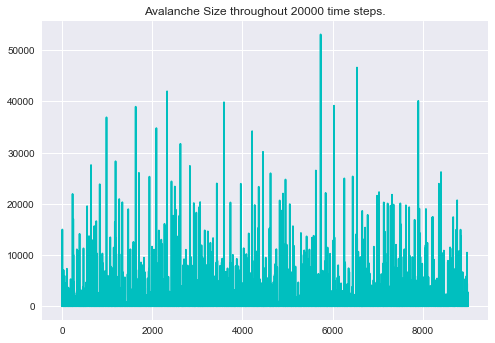

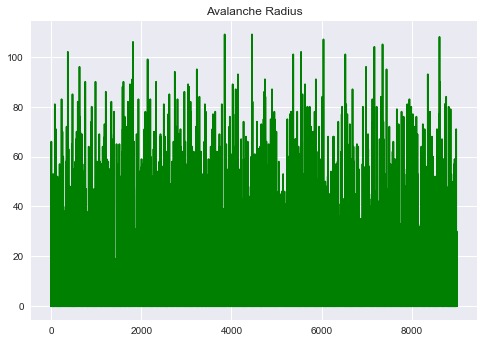

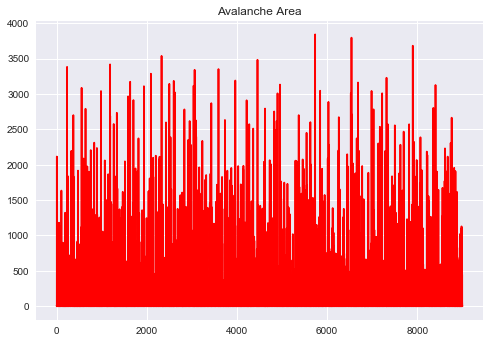

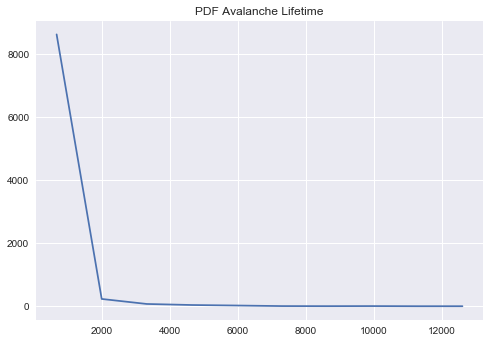

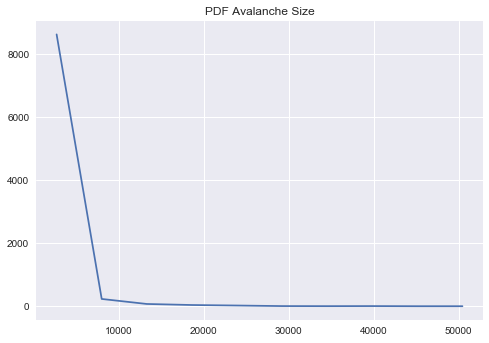

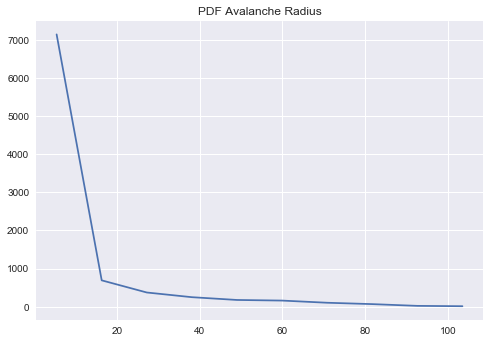

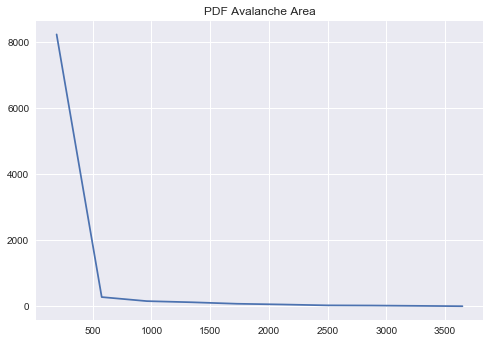

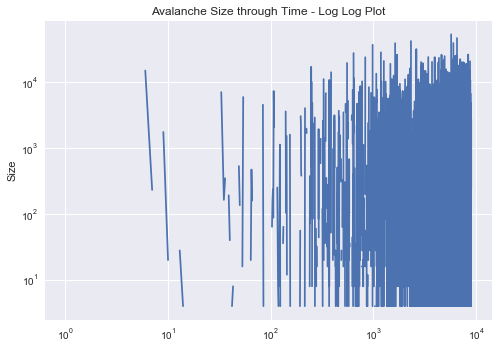

size = mass 0.13857284269
size = area 0.938848971792
size = lifetime 1.0
size = radius 0.764280337976


In [6]:
### Change parameters here ###

M = 70               # table length
N = 70               # table width
time = 20000         # time of simulations
threshold = 4        # threshold of toppling condition 
show_step = False    # show sandpile by step
method = 'random'    # 'random' or 'center'


avalanche_mass,avalanche_size,avalanche_lifetime,avalanche_area,avalanche_radius,sandpile = BTWsandpile(M,N,show_step,time,threshold,method)


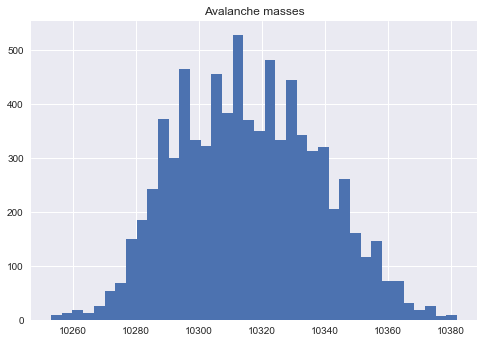

In [7]:

plt.hist(avalanche_mass[12000:], bins='auto')   
plt.title("Avalanche masses")
plt.show()
savefig('masses_pdf.jpg', bbox_inches='tight')
plt.clf()

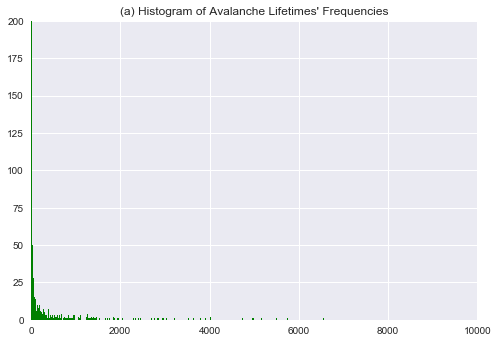

In [27]:
d = list(filter(lambda x: x > 0, avalanche_lifetime))
plt.hist(d, bins=range(min(d), max(d) + 3, 3), color = 'g')   
plt.title("(a) Histogram of Avalanche Lifetimes' Frequencies")
plt.xlim([0,10000])
plt.ylim([0,200])
plt.show()
savefig('lifetime_pdf.jpg', bbox_inches='tight')
plt.clf()

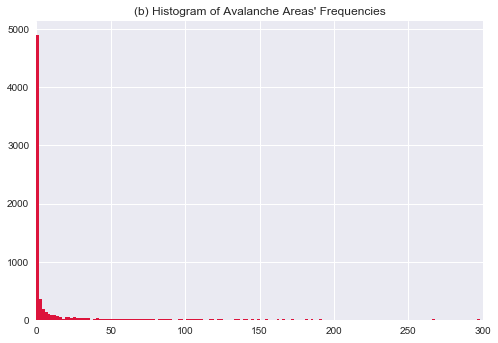

In [30]:
plt.hist(avalanche_area[12000:], bins='auto',color = "crimson")   
plt.title("(b) Histogram of Avalanche Areas' Frequencies")
plt.xlim([0,300])
#plt.ylim([0,1000])
plt.show()
savefig('areas_pdf.jpg', bbox_inches='tight')
plt.clf()

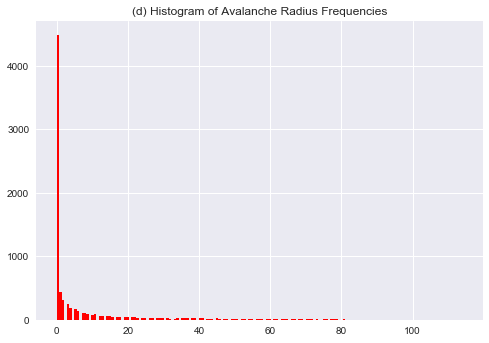

In [122]:
plt.hist(avalanche_radius[12000:], bins='auto',color='r')   
plt.title("(d) Histogram of Avalanche Radius Frequencies")
plt.show()
plt.clf()

In [47]:
import powerlaw
data = avalanche_mass[1200:] # data can be list or numpy array
results = powerlaw.Fit(data)
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')


Calculating best minimal value for power law fit
/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


532.382344124
10323.0


/anaconda3/lib/python3.6/site-packages/powerlaw.py:1175: RuntimeWarning: overflow encountered in double_scalars
  return (self.alpha-1) * self.xmin**(self.alpha-1)
/anaconda3/lib/python3.6/site-packages/powerlaw.py:822: RuntimeWarning: invalid value encountered in multiply
  likelihoods = f*C


Calculating best minimal value for power law fit
/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/anaconda3/lib/python3.6/site-packages/powerlaw.py:1557: RuntimeWarning: invalid value encountered in true_divide
  return likelihoods/norm
/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/anaconda3/lib/python3.6/site-packages/powerlaw.py:1182: RuntimeWarning: divide by zero encountered in double_scalars
  C = 1.0/C
/anaconda3/lib/python3.6/site-packages/powerlaw.py:827: RuntimeWarning: invalid value encountered in multiply
  likelihoods = f*C


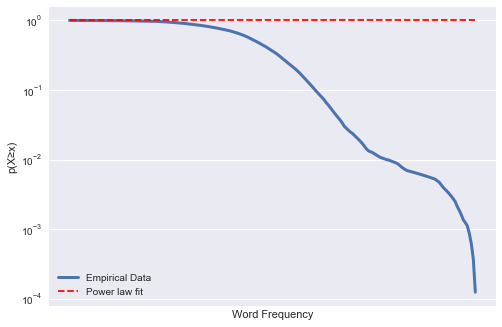

In [84]:
import powerlaw
import os
import numpy
import matplotlib.pyplot as plt


d = avalanche_mass[12000:] # data can be list or numpy array
fit = powerlaw.Fit(d, discrete=True)
####

fit.distribution_compare('power_law', 'lognormal')
fig = fit.plot_ccdf(linewidth=3, label='Empirical Data')
fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')
#fit.lognormal.plot_ccdf(ax=plot, color='g', linestyle='--', label='Lognormal fit')
####
fig.set_ylabel( " ")
fig.set_xlabel("Word Frequency")
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc=3)
plt.show()
plt.clf()
figname = 'FigLognormal'
savefig(figname+'.eps', bbox_inches='tight')
#savefig(figname+'.tiff', bbox_inches='tight', dpi=300)

In [107]:
import powerlaw
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(1, 1)

d = avalanche_mass[12000:]
fit = powerlaw.Fit(numpy.array(d)+1,xmin=1,discrete=True)
fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_pdf( color= 'b')
savefig('d.eps', bbox_inches='tight')


print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)

alpha=  1.10066910743   sigma=  0.00112558518846


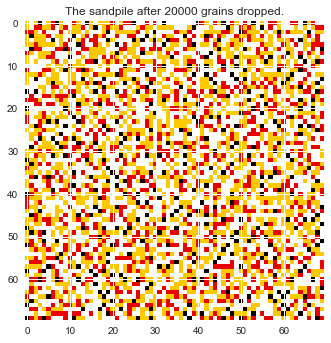

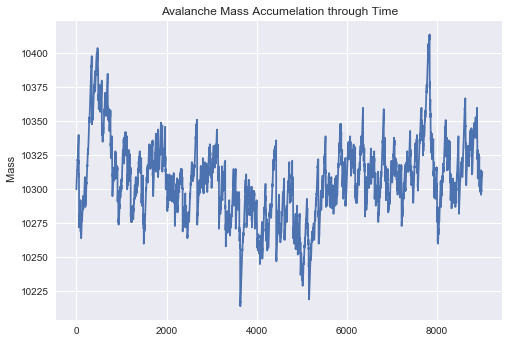

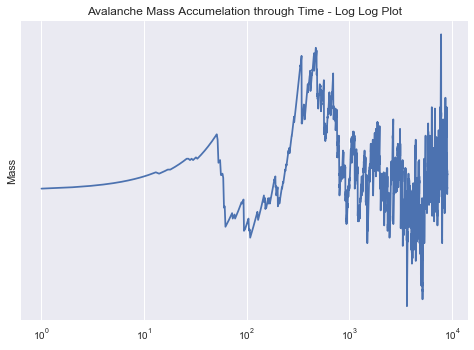

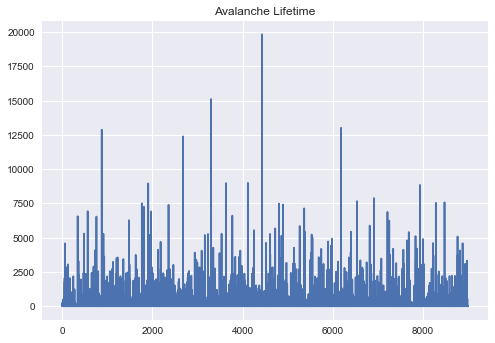

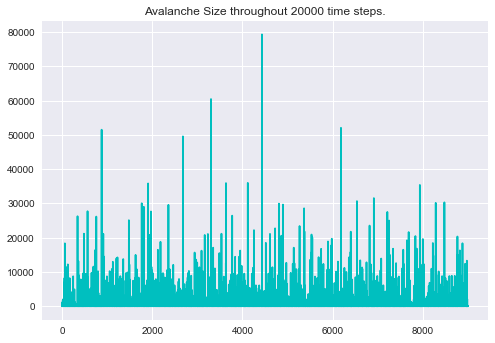

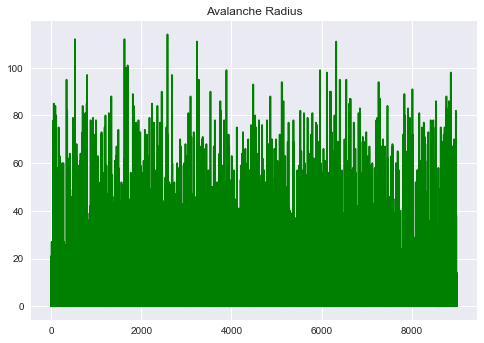

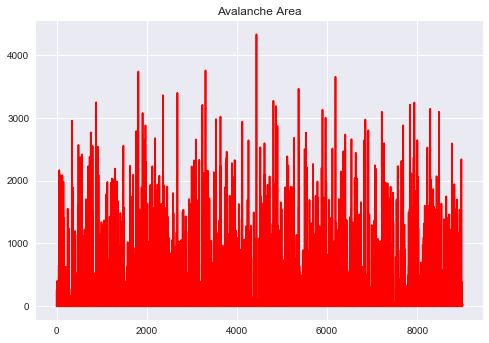

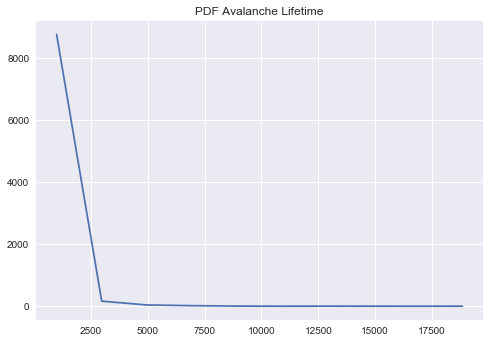

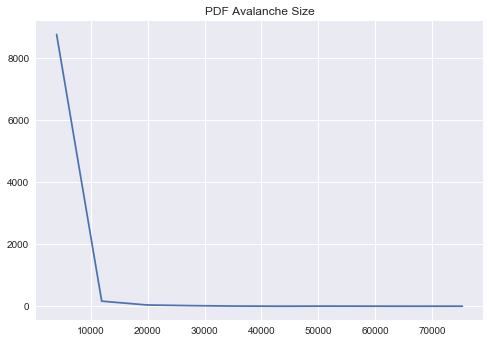

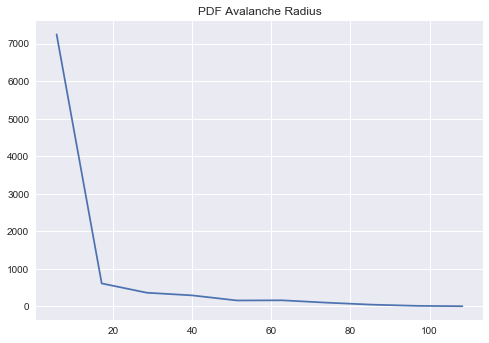

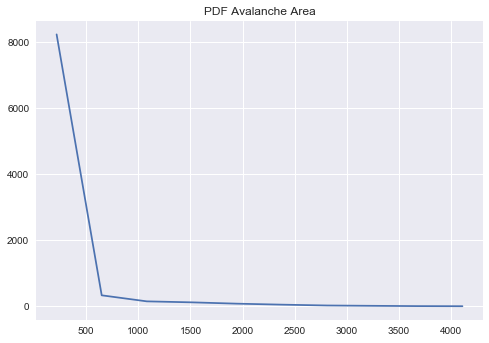

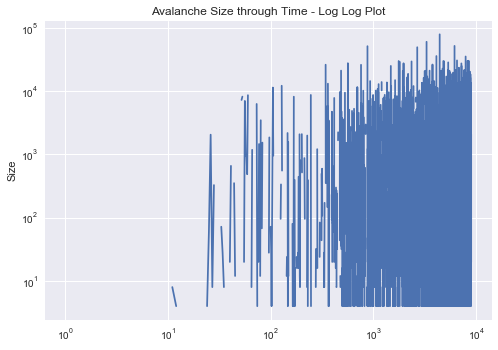

In [103]:
generate_plots(sandpile,time,avalanche_mass,avalanche_size,avalanche_lifetime,avalanche_area,avalanche_radius)

